<a href="https://colab.research.google.com/github/seungmin-son/ML_Practice/blob/main/%EA%B8%B0%EA%B3%84%ED%95%99%EC%8A%B5%EB%A1%A0_7%EC%A3%BC%EC%B0%A8%EC%8B%A4%EC%8A%B5.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# 필요한 라이브러리 & 데이터셋 불러오기

In [75]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [76]:
df = pd.read_csv('./titanic.csv')
df.head()


,pclass,survived,name,sex,age,sibsp,parch,ticket,fare,cabin,embarked,boat,body,home.dest
0,1,1,"Allen, Miss. Elisabeth Walton",female,29.0000,0,0,24160,211.3375,B5,S,2,NaN,"St Louis, MO"
1,1,1,"Allison, Master. Hudson Trevor",male,0.9167,1,2,113781,151.5500,C22 C26,S,11,NaN,"Montreal, PQ / Chesterville, ON"
2,1,0,"Allison, Miss. Helen Loraine",female,2.0000,1,2,113781,151.5500,C22 C26,S,NaN,NaN,"Montreal, PQ / Chesterville, ON"
3,1,0,"Allison, Mr. Hudson Joshua Creighton",male,30.0000,1,2,113781,151.5500,C22 C26,S,NaN,135.0,"Montreal, PQ / Chesterville, ON"
4,1,0,"Allison, Mrs. Hudson J C (Bessie Waldo Daniels)",female,25.0000,1,2,113781,151.5500,C22 C26,S,NaN,NaN,"Montreal, PQ / Chesterville, ON"


# 데이터 전처리 & EDA

## 라벨링

In [77]:
from sklearn.preprocessing import LabelEncoder

le = LabelEncoder()
le.fit(df['sex'])

df['gender'] = le.transform(df['sex'])
df.head()

,pclass,survived,name,sex,age,sibsp,parch,ticket,fare,cabin,embarked,boat,body,home.dest,gender
0,1,1,"Allen, Miss. Elisabeth Walton",female,29.0000,0,0,24160,211.3375,B5,S,2,NaN,"St Louis, MO",0
1,1,1,"Allison, Master. Hudson Trevor",male,0.9167,1,2,113781,151.5500,C22 C26,S,11,NaN,"Montreal, PQ / Chesterville, ON",1
2,1,0,"Allison, Miss. Helen Loraine",female,2.0000,1,2,113781,151.5500,C22 C26,S,NaN,NaN,"Montreal, PQ / Chesterville, ON",0
3,1,0,"Allison, Mr. Hudson Joshua Creighton",male,30.0000,1,2,113781,151.5500,C22 C26,S,NaN,135.0,"Montreal, PQ / Chesterville, ON",1
4,1,0,"Allison, Mrs. Hudson J C (Bessie Waldo Daniels)",female,25.0000,1,2,113781,151.5500,C22 C26,S,NaN,NaN,"Montreal, PQ / Chesterville, ON",0


## 결측치 처리

In [78]:
df = df[df['age'].notnull()]
df = df[df['fare'].notnull()]
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 1045 entries, 0 to 1308
Data columns (total 15 columns):
 #   Column     Non-Null Count  Dtype  
---  ------     --------------  -----  
 0   pclass     1045 non-null   int64  
 1   survived   1045 non-null   int64  
 2   name       1045 non-null   object 
 3   sex        1045 non-null   object 
 4   age        1045 non-null   float64
 5   sibsp      1045 non-null   int64  
 6   parch      1045 non-null   int64  
 7   ticket     1045 non-null   object 
 8   fare       1045 non-null   float64
 9   cabin      272 non-null    object 
 10  embarked   1043 non-null   object 
 11  boat       417 non-null    object 
 12  body       119 non-null    float64
 13  home.dest  685 non-null    object 
 14  gender     1045 non-null   int64  
dtypes: float64(3), int64(5), object(7)
memory usage: 130.6+ KB


## 특성 데이터 추출

In [79]:
X = df[['pclass','age','sibsp','parch','fare','gender']].values
y = df['survived'].values

## Sclaer 적용 & 데이터셋 분리

In [80]:
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()
scaler.fit(X)

X_scaled  = scaler.transform(X)

# 모델 학습 & 교차 검증

In [81]:
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import KFold

log_reg_kf = LogisticRegression(random_state=13, solver='liblinear')
kfold = KFold(n_splits=5)

cv_accuracy = []

In [82]:
from sklearn.metrics import accuracy_score

for train_idx, test_idx, in kfold.split(X_scaled):

  X_train, X_test = X_scaled[train_idx], X_scaled[test_idx]
  y_train, y_test = y[train_idx], y[test_idx]

  log_reg_kf.fit(X_train, y_train)

  pred = log_reg_kf.predict(X_test)
  accuracy = accuracy_score(y_test, pred)

  cv_accuracy.append(accuracy)

In [83]:
cv_accuracy

[0.7655502392344498,
 0.8660287081339713,
 0.8229665071770335,
 0.7464114832535885,
 0.7081339712918661]

In [84]:
import numpy as np

np.mean(cv_accuracy)

0.7818181818181819

In [85]:
for train_idx, test_idx in kfold.split(X_scaled):
  X_train, X_test = X_scaled[train_idx], X_scaled[test_idx]
  y_train, y_test = y[train_idx], y[test_idx]

  print(np.unique(y_test, return_counts=True))

(array([0, 1]), array([ 74, 135]))
(array([0, 1]), array([107, 102]))
(array([0, 1]), array([125,  84]))
(array([0, 1]), array([155,  54]))
(array([0, 1]), array([157,  52]))


In [86]:
from sklearn.model_selection import StratifiedKFold

log_reg_kf = LogisticRegression(random_state=13, solver='liblinear')
skfold = StratifiedKFold(n_splits=5)

cv_accuracy = []

In [87]:
for train_idx, test_idx in skfold.split(X_scaled, y):
  X_train, X_test = X_scaled[train_idx], X_scaled[test_idx]
  y_train = y[train_idx]
  y_test = y[test_idx]
  print(np.unique(y_test, return_counts = True))

(array([0, 1]), array([123,  86]))
(array([0, 1]), array([123,  86]))
(array([0, 1]), array([124,  85]))
(array([0, 1]), array([124,  85]))
(array([0, 1]), array([124,  85]))


In [88]:
for train_idx, test_idx in skfold.split(X_scaled,y):
  X_train, X_test = X_scaled[train_idx], X_scaled[test_idx]
  y_train, y_test = y[train_idx], y[test_idx]

  log_reg_kf.fit(X_train, y_train)

  pred = log_reg_kf.predict(X_test)
  accuracy = accuracy_score(y_test, pred)

  cv_accuracy.append(accuracy)

In [89]:
cv_accuracy

[0.569377990430622,
 0.861244019138756,
 0.8133971291866029,
 0.7368421052631579,
 0.6555023923444976]

In [90]:
np.mean(cv_accuracy)

0.7272727272727273

In [91]:
from sklearn.model_selection import cross_val_score

scores = cross_val_score(log_reg_kf,X_scaled, y, scoring = 'accuracy', cv= 5)

In [92]:
scores

array([0.56937799, 0.86124402, 0.81339713, 0.73684211, 0.65550239])

In [93]:
np.mean(scores)

0.7272727272727273

# 데이터 분리 이후 Binarizer 적용

In [94]:
from sklearn.model_selection import train_test_split

X = df[['pclass','age','sibsp','parch','fare','gender']]
y = df['survived']

scaler = StandardScaler()
scaler.fit(X)

X_scaled  = scaler.transform(X)

X_train, X_test, y_train, y_test = train_test_split(X_scaled, y,
                                                    test_size=0.2,
                                                    random_state=13)

In [95]:
from sklearn.linear_model import LogisticRegression

log_reg = LogisticRegression(random_state=13, solver='liblinear')
log_reg.fit(X_train, y_train)

pred = log_reg.predict(X_test)

In [104]:
from sklearn.preprocessing import Binarizer

custom_threshold = 0.5

pred_proba = log_reg.predict_proba(X_test)
pred_proba_1 = pred_proba[:,1].reshape(-1,1)

binarizer = Binarizer(threshold = custom_threshold).fit(pred_proba_1)
custom_predict = binarizer.transform(pred_proba_1)

custom_predict[:5]

array([[0.],
       [0.],
       [0.],
       [0.],
       [1.]])

In [103]:
from sklearn.metrics import accuracy_score, precision_score, recall_score

print('Threshold : ', custom_threshold)
print('accuracy_score:  : ', accuracy_score(y_test,custom_predict))
print('precision_score : ', precision_score(y_test, custom_predict))
print('recall_score : ', recall_score(y_test, custom_predict))


Threshold :  0.5
accuracy_score:  :  0.7559808612440191
precision_score :  0.7534246575342466
recall_score :  0.625


### Threshold  비교

In [105]:
custom_threshold = 0.3

pred_proba = log_reg.predict_proba(X_test)
pred_proba_1 = pred_proba[:,1].reshape(-1,1)
binarizer = Binarizer(threshold = custom_threshold).fit(pred_proba_1)
custom_predict = binarizer.transform(pred_proba_1)

print('Threshold : ', custom_threshold)
print('accuracy_score:  : ', accuracy_score(y_test,custom_predict))
print('precision_score : ', precision_score(y_test, custom_predict))
print('recall_score : ', recall_score(y_test, custom_predict))

Threshold :  0.3
accuracy_score:  :  0.7607655502392344
precision_score :  0.6938775510204082
recall_score :  0.7727272727272727


In [106]:
custom_threshold = 0.8

pred_proba = log_reg.predict_proba(X_test)
pred_proba_1 = pred_proba[:,1].reshape(-1,1)
binarizer = Binarizer(threshold = custom_threshold).fit(pred_proba_1)
custom_predict = binarizer.transform(pred_proba_1)

print('Threshold : ', custom_threshold)
print('accuracy_score:  : ', accuracy_score(y_test,custom_predict))
print('precision_score : ', precision_score(y_test, custom_predict))
print('recall_score : ', recall_score(y_test, custom_predict))

Threshold :  0.8
accuracy_score:  :  0.722488038277512
precision_score :  0.9411764705882353
recall_score :  0.36363636363636365


### ROC 커브 코드

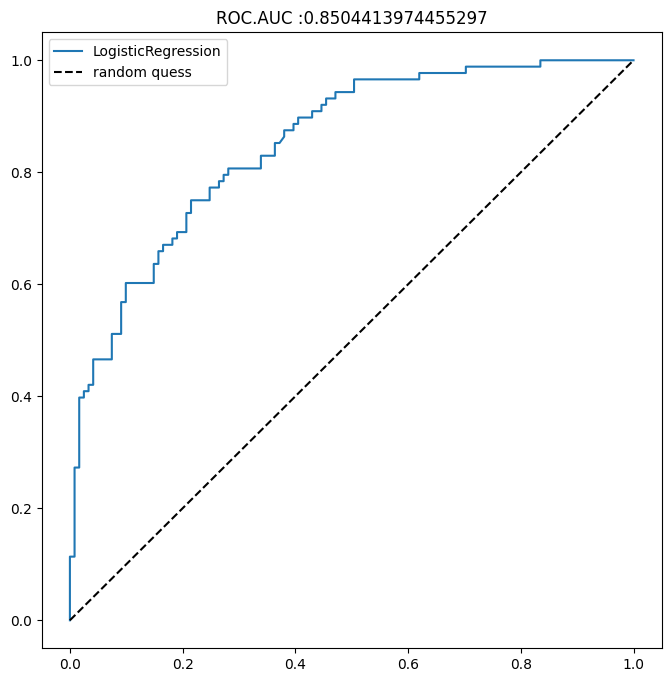

In [108]:
from sklearn.metrics import roc_curve, roc_auc_score

pred_proba_1 = log_reg.predict_proba(X_test)[:,1]

fpr, tpr, thresholds = roc_curve(y_test, pred_proba_1)

plt.figure(figsize=(8,8))
plt.plot(fpr,tpr,label= 'LogisticRegression')
plt.plot([0,1],[0,1],'k--', label='random quess')
plt.title("ROC.AUC :" + str(roc_auc_score(y_test,pred_proba_1)))
plt.legend()
plt.show()

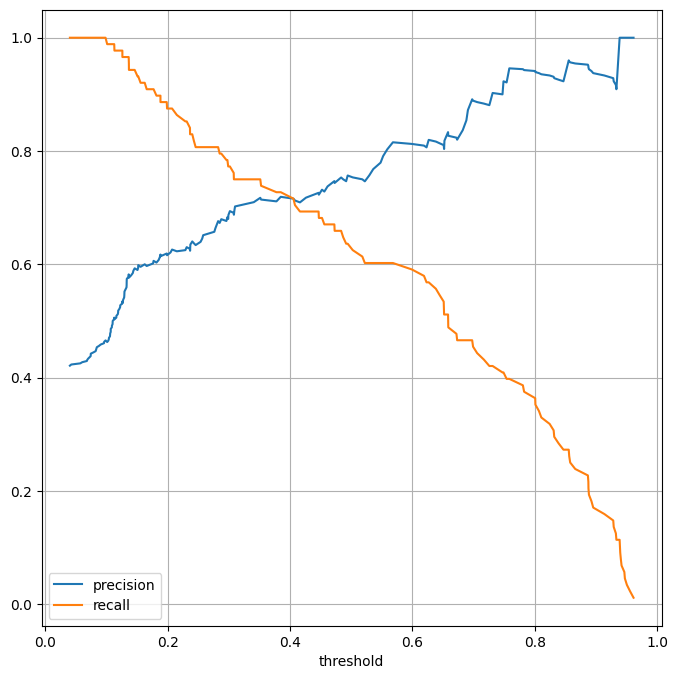

In [109]:
from sklearn.metrics import precision_recall_curve

precisions, recalls, thresholds = precision_recall_curve(y_test, pred_proba_1)

plt.figure(figsize=(8,8))
plt.plot(thresholds, precisions[: len(thresholds)], label= 'precision')
plt.plot(thresholds, recalls[: len(thresholds)], label= 'recall')

plt.legend()
plt.grid()
plt.xlabel('threshold')
plt.show()